<a href="https://colab.research.google.com/github/prithvi206/Building-Neural-network-without-using-keras-and-Tensorflow/blob/main/dL_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPLEMENTING NEURAL NETWORKS FROM SCRATCH USING NUMPY WITHOUT KERAS NOR TENSORFLOW

NN will have a simple two-layer architecture. Input layer  𝑎[0]
  will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer  𝑎[1]
  will have 10 units with ReLU activation, and finally our output layer  𝑎[2]
  will have 10 units corresponding to the ten digit classes with softmax activation.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import requests
train_request_url = "https://drive.google.com/uc?export=download&id=1ZgF95Sr6QYrB-7QnQT4Cz02lcDfxDRiV"
response = requests.get(train_request_url)
with open("train_dataset.csv","wb") as file:
  file.write(response.content)

test_request_url = "https://drive.google.com/uc?export=download&id=1muBKX2jjm-6nhmQM8a8eQAIDxZdtTirh"
response = requests.get(test_request_url)
with open("test_dataset.csv","wb") as file:
  file.write(response.content)

data = pd.read_csv("train_dataset.csv")
test_data = pd.read_csv("test_dataset.csv")

In [91]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data.T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data.T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape


In [ ]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)


def softmax(x):
    # Ensure the input is a numpy array
    x = np.array(x)

    # Subtract the max value from each element to prevent overflow
    x_max = np.max(x, axis=0, keepdims=True)
    e_x = np.exp(x - x_max)

    # Compute the softmax values
    sum_e_x = np.sum(e_x, axis=0, keepdims=True)
    softmax_values = e_x / sum_e_x

    return softmax_values

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [92]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10,500)

Iteration:  0
[6 6 6 ... 6 6 6] [8 5 3 ... 4 9 0]
0.12814285714285714
Iteration:  50
[2 5 3 ... 4 9 6] [8 5 3 ... 4 9 0]
0.5768571428571428
Iteration:  100
[2 5 3 ... 4 9 6] [8 5 3 ... 4 9 0]
0.7041904761904761
Iteration:  150
[5 5 3 ... 4 9 0] [8 5 3 ... 4 9 0]
0.7633095238095238
Iteration:  200
[5 5 3 ... 4 9 0] [8 5 3 ... 4 9 0]
0.7932142857142858
Iteration:  250
[5 5 3 ... 4 9 0] [8 5 3 ... 4 9 0]
0.8146190476190476
Iteration:  300
[5 5 3 ... 4 9 0] [8 5 3 ... 4 9 0]
0.8286428571428571
Iteration:  350
[5 5 3 ... 4 9 0] [8 5 3 ... 4 9 0]
0.8383809523809523
Iteration:  400
[5 5 3 ... 4 9 0] [8 5 3 ... 4 9 0]
0.846
Iteration:  450
[5 5 3 ... 4 9 0] [8 5 3 ... 4 9 0]
0.8521190476190477


In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


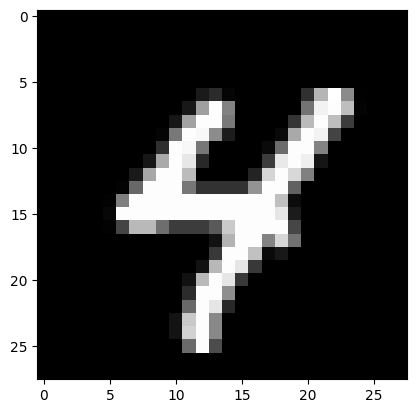

Prediction:  [6]
Label:  6


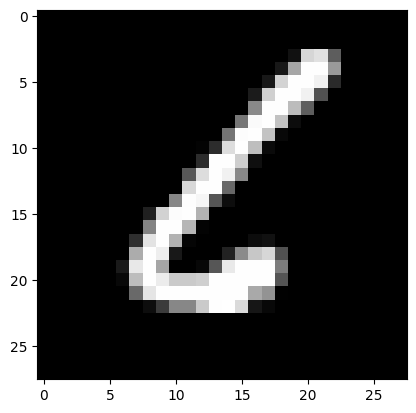

Prediction:  [4]
Label:  4


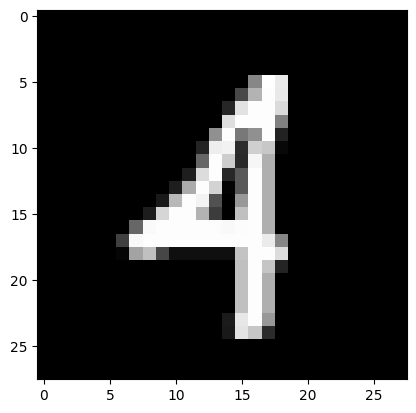

Prediction:  [1]
Label:  1


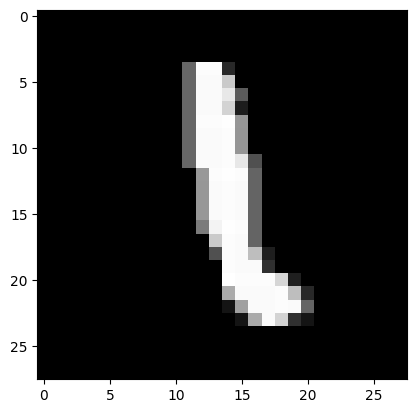

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[6 7 9 0 3 1 3 2 2 0 2 6 6 9 4 7 7 8 9 6 3 3 3 4 1 0 5 0 5 8 4 8 0 1 7 8 5
 2 1 1 4 2 5 8 8 2 4 8 1 7 9 9 9 8 3 1 9 2 1 1 2 9 4 5 0 0 7 9 7 1 0 7 1 4
 1 5 0 1 7 2 9 6 2 9 7 6 5 8 6 5 7 3 6 1 9 6 9 5 6 4 5 6 1 7 2 9 4 5 7 9 2
 8 7 4 8 9 7 5 0 6 0 9 2 9 4 2 9 0 7 7 4 1 5 4 7 9 5 2 2 3 9 3 3 0 4 2 0 7
 9 7 3 6 4 7 7 7 0 9 3 2 8 7 9 1 6 9 3 9 2 3 5 9 0 7 0 6 1 5 3 7 6 8 4 5 9
 0 6 1 0 7 2 1 9 0 1 8 0 6 3 1 6 1 3 8 8 7 3 7 6 2 1 2 9 9 9 2 1 3 0 4 1 8
 2 6 3 0 6 0 5 2 9 2 7 0 3 9 7 8 7 3 6 0 9 8 5 9 2 3 8 5 0 7 7 4 9 9 4 2 3
 1 7 5 2 8 8 9 6 5 8 7 4 5 6 7 3 0 0 7 1 1 5 7 3 7 9 1 5 0 3 9 9 2 9 2 4 1
 1 7 7 9 2 3 4 6 5 7 7 0 9 3 5 3 0 9 7 1 1 5 9 7 5 4 6 5 1 6 9 8 7 0 0 1 8
 4 6 9 4 7 0 3 6 1 9 9 0 5 5 6 4 0 2 1 2 3 8 9 6 4 7 0 4 0 3 4 4 1 9 0 2 2
 8 4 2 0 7 3 2 7 9 6 7 0 2 7 4 7 5 0 4 0 0 0 8 0 2 1 0 0 0 6 7 2 5 6 8 1 1
 0 5 9 1 8 8 8 1 9 3 6 6 5 9 3 4 8 9 8 3 6 9 6 5 4 2 6 0 3 1 8 2 3 2 9 4 1
 4 8 8 8 1 9 1 8 4 2 1 4 3 2 4 7 0 4 9 7 3 1 9 5 8 7 3 1 4 8 3 1 1 8 4 3 1
 0 6 4 9 9 1 3 9 2 2 9 0 

0.827